# <font face = 'Impact' color = '#FFAEBC' > Getting Ready with our Second Mini-Project <font/>
#### <font face = 'Times New Roman' color = '#A16AE8'> Author and Trainer: Paolo Hilado MSc. (Data Science)<font/>
In this notebook, we will be importing packages and use them to load and explore data sets. We will be using the pandas package to load datasets and qdesc to explore both categorical and numerical variables. Functions to be used include pd.read_excel, pd.read_csv, head, qd.desc, qd.normcheck_dashboard, qd.freqdist_a, and qd.freqdist_to_excel.

# <font face = 'Impact' color = '#FFAEBC' > Exploring Sleep Hours during Weeknights <font/> 

In [15]:
# Importing the necessary packages for us to use certain functions.
import pandas as pd
import numpy as np
import qdesc as qd

In [16]:
# Loading a data set (SleepData.xlsx) and storing it into a variable.
df = pd.read_excel("SleepData.xlsx")

In [17]:
# Check the first 5 rows of the dataframe
df.head

<bound method NDFrame.head of         Sex  Age MaritalStatus    Employment  sleep(hrs)/weeknights
0      Male   30        Single     Permanent                   8.85
1    Female   58       Married     Permanent                   8.76
2    Female   60        Single     Permanent                   8.49
3      Male   43        Single     Permanent                   8.85
4    Female   43        Single     Permanent                   8.73
..      ...  ...           ...           ...                    ...
666  Female   59       Married  Probationary                   6.15
667  Female   76        Single  Probationary                   4.90
668    Male   72       Married  Probationary                   6.41
669  Female   25        Single  Probationary                   5.18
670    Male   56        Single  Probationary                   6.22

[671 rows x 5 columns]>

In [18]:
# Check the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    671 non-null    object 
 1   Age                    671 non-null    int64  
 2   MaritalStatus          671 non-null    object 
 3   Employment             671 non-null    object 
 4   sleep(hrs)/weeknights  671 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 26.3+ KB


In [19]:
# Using the desc function from the qdesc package to perform descriptive analysis.
desc = df.describe()
desc.T

,count,mean,std,min,25%,50%,75%,max
Age,671.0,49.804769,19.360809,18.00,33.000,49.00,66.500,84.00
sleep(hrs)/weeknights,671.0,7.626021,1.390674,4.52,6.255,8.34,8.885,9.88


In [49]:
# Generate descriptive analysis for sleep hours when grouped by sex.
sleephrs_by_sex = df.groupby('Sex') ['sleep(hrs)/weeknights'].describe()
sleephrs_by_sex

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,350.0,7.672943,1.358217,4.52,6.3475,8.33,8.88,9.88
Male,321.0,7.574860,1.425584,4.66,6.2100,8.36,8.89,9.64


In [50]:
#The table shows that both groups had a close average number of hours. 
# Multiple researches shows that both men and women need atleast 7-9 hours of sleep per night.
# Medians are also slightly higher than means, suggesting mild left-skewness which means that a few individuals sleep less than the majority.
# The slightly higher standard deviation for males suggests their sleep hours are more varied, or spread out, from the average compared to females.
# The minimum sleep duration is 5 hours for both sexes, and the maximum is 8 hours for both. 
# Despite sleeping for slightly more hours on average, the provided research suggests that females experience a higher prevalence of poor sleep quality compared to their male counterparts.
# Reference: https://pmc.ncbi.nlm.nih.gov/articles/PMC5302457/

In [29]:
# Generate descriptive analysis for sleep hours when grouped by employment.
sleephrs_by_employment = df.groupby('Employment') ['sleep(hrs)/weeknights'].describe()
sleephrs_by_employment

,count,mean,std,min,25%,50%,75%,max
Employment,,,,,,,,
Permanent,352.0,8.868438,0.322398,7.96,8.64,8.86,9.0925,9.88
Probationary,319.0,6.255078,0.604951,4.52,5.86,6.22,6.6400,7.90


In [ ]:
# Permanent employees sleep significantly more on average, with a mean of 8.86 hours, compared to probationary employees who sleep only 6.25 hours on average. This probably reflects the stability and reduced stress of each employees.
# The sleep hours for permanent employees are much more consistent while probationary employees have a more varied and less stable result.
# The full range of sleep hours for permanent employees, from a minimum of 7.9 hours to a maximum of 9.88 hours, is entirely higher than the range for probationary employees, which spans from 4.5 hours to a maximum of 7.90 hours. 
# This shows that permanent employees are consistently getting more sleep than their probationary counterparts across the board.

In [30]:
# Generate descriptive analysis for sleep hours when grouped by marital status.
sleephrs_by_ms = df.groupby('MaritalStatus') ['sleep(hrs)/weeknights'].describe()
sleephrs_by_ms

,count,mean,std,min,25%,50%,75%,max
MaritalStatus,,,,,,,,
Married,333.0,7.667838,1.396639,4.66,6.2500,8.44,8.93,9.64
Single,338.0,7.584822,1.385605,4.52,6.2725,8.26,8.85,9.88


In [ ]:
# Both married and single individuals have nearly identical average sleep durations
# The standard deviation indicates that the spread of sleep hours around the average is equally varied for married and single individuals.
# The entire distribution of sleep hours, from the minimum to the maximum, is very similar for both groups, as shown by the quartiles. 
# This suggests that marital status has little to no impact on sleep duration.


--- Variable: Age ---
  Anderson-Darling Statistic : 7.3813
  Critical Value (@ 5.0%) : 0.7820
  Decision : Reject Null


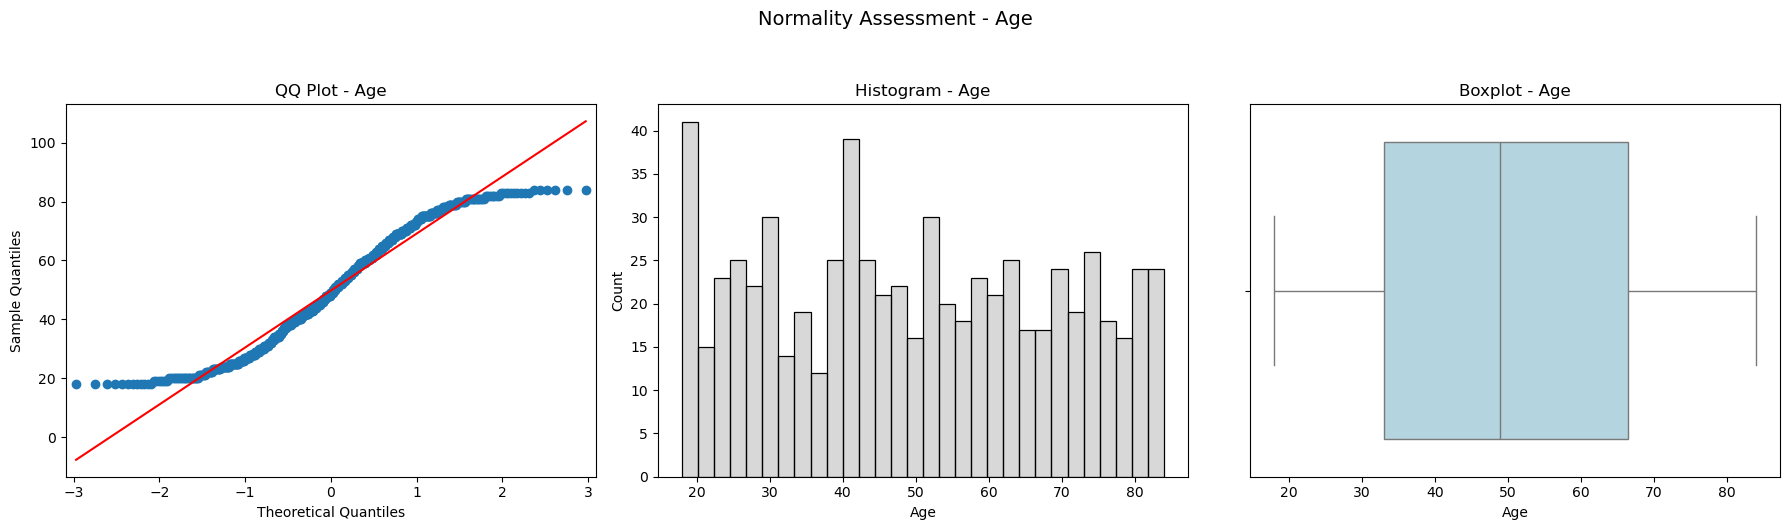


--- Variable: sleep(hrs)/weeknights ---
  Anderson-Darling Statistic : 35.6977
  Critical Value (@ 5.0%) : 0.7820
  Decision : Reject Null


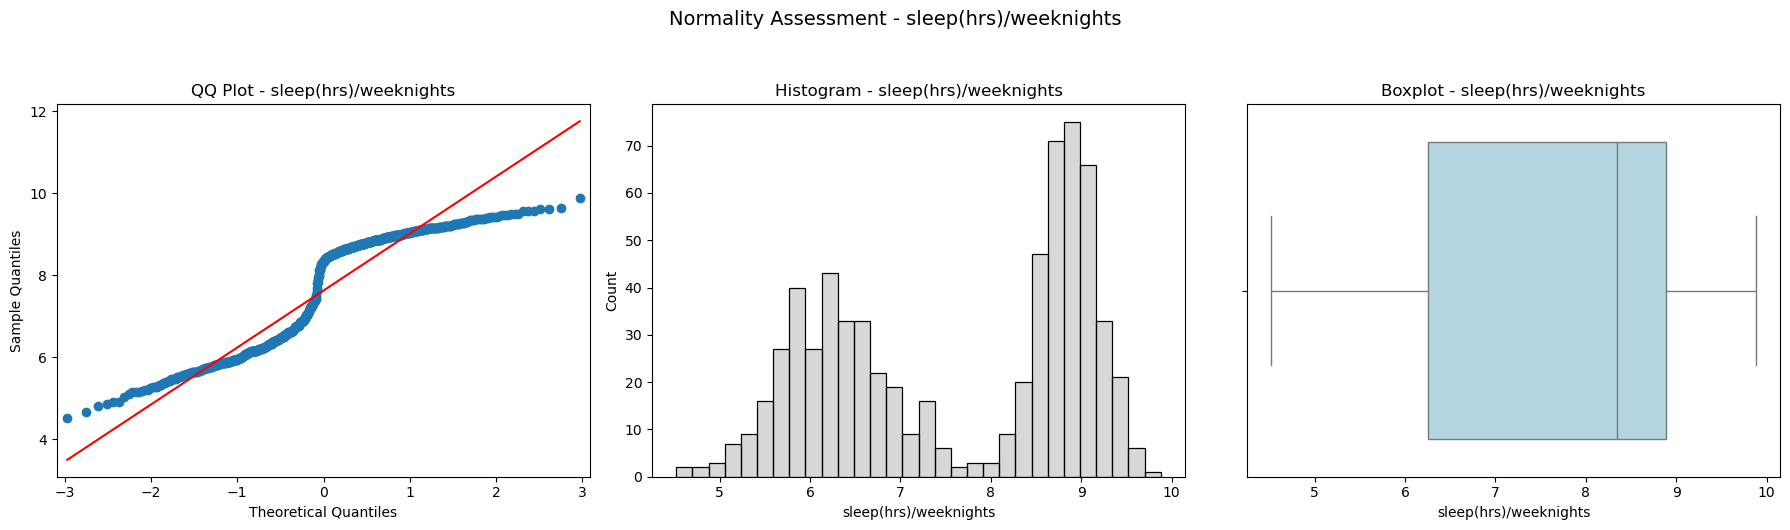

In [27]:
# Use the desc function from the qdesc package to explore the data for assumption of normality.
qd.normcheck_dashboard(df)

In [ ]:
# The graph shows that the most common marital status is Single. The graph shows that it is not normaly distributed. 
# For Singles, this indicates that there are more individuals with very low or very high sleep hours.
# For Married, The distribution of sleep hours for the married subset is a much better fit for a normal distribution than the overall dataset. This suggests that the sleep patterns of married individuals are more consistent with a normal distribution model.

In [33]:
# Slicing the data frame to only include the single.
Single = df[df['MaritalStatus'] == 'Single']
Single.head()

,Sex,Age,MaritalStatus,Employment,sleep(hrs)/weeknights
0,Male,30,Single,Permanent,8.85
2,Female,60,Single,Permanent,8.49
3,Male,43,Single,Permanent,8.85
4,Female,43,Single,Permanent,8.73
6,Male,45,Single,Permanent,8.36


In [34]:
# Confirm that the subset would only include those who are single.
np.unique(Single.MaritalStatus)

array(['Single'], dtype=object)


--- Variable: Age ---
  Anderson-Darling Statistic : 3.0459
  Critical Value (@ 5.0%) : 0.7780
  Decision : Reject Null


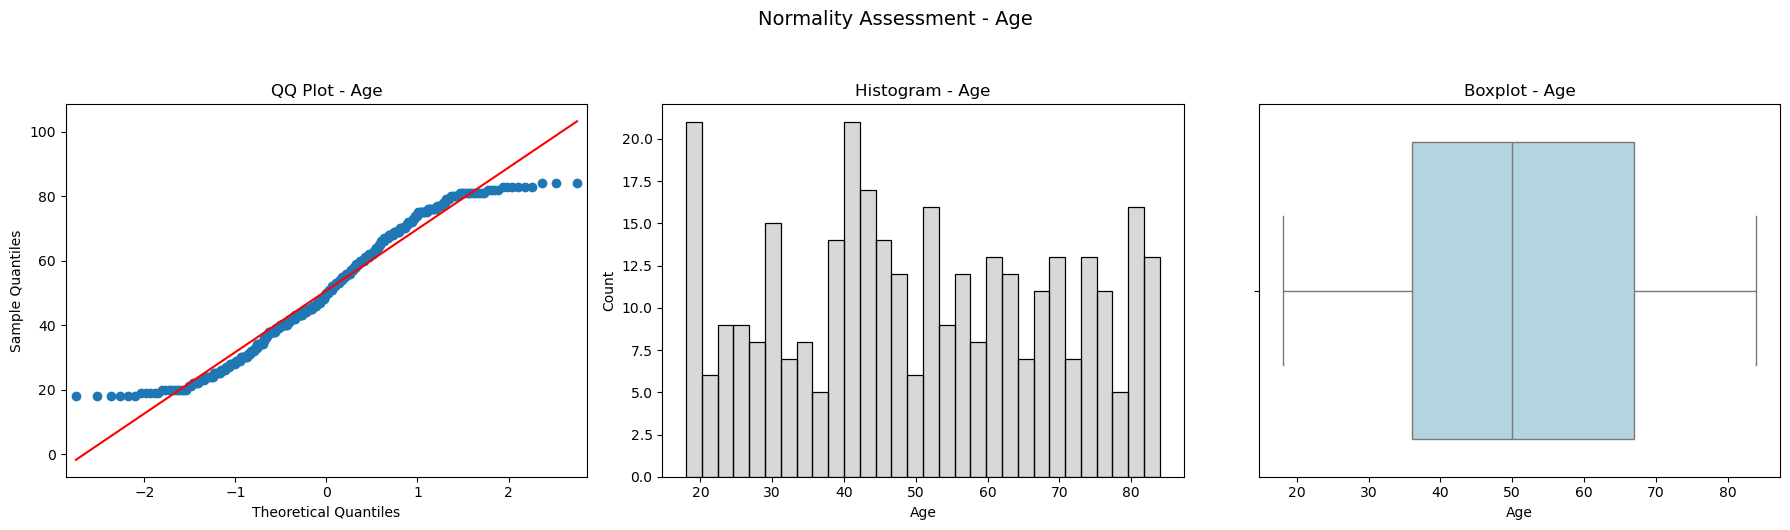


--- Variable: sleep(hrs)/weeknights ---
  Anderson-Darling Statistic : 16.5637
  Critical Value (@ 5.0%) : 0.7780
  Decision : Reject Null


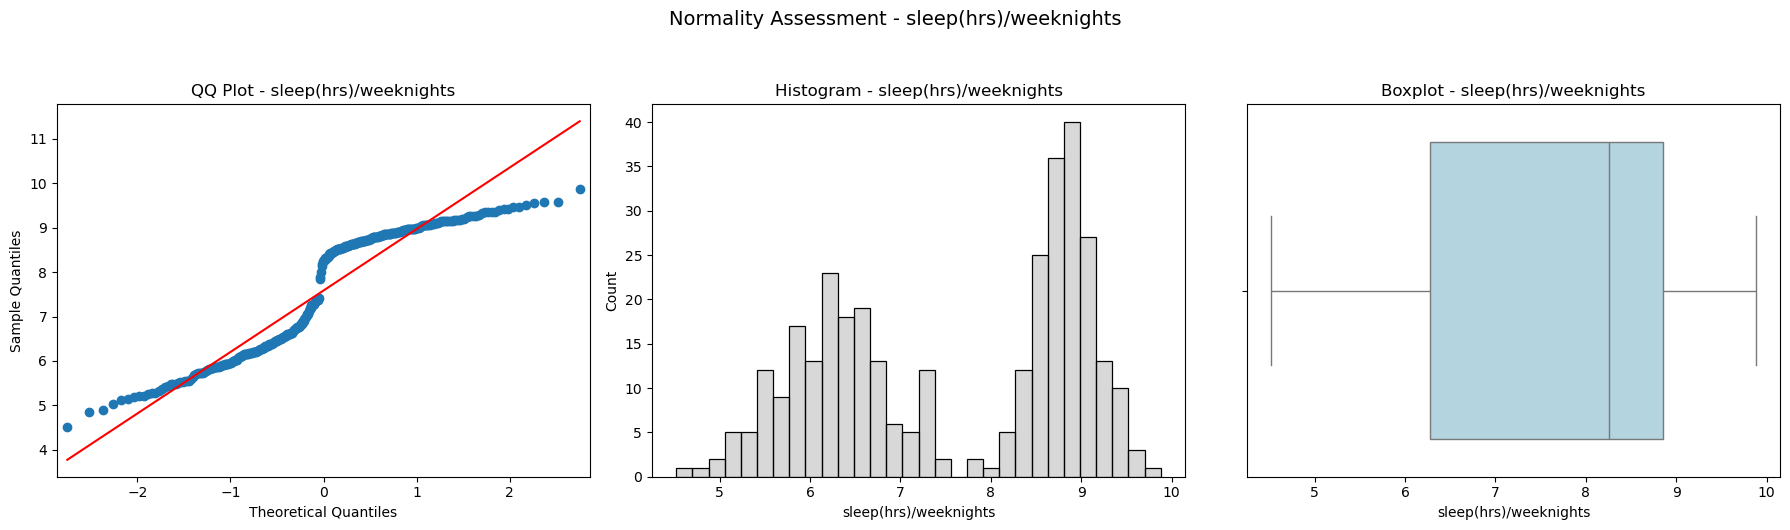

In [35]:
# Use the qdesc package to explore the data (only those who are Single) for assumption of normality.
qd.normcheck_dashboard(Single)

In [ ]:
# The first graph shows that the overall distribution of sleep hours is not normal, as the data points deviate significantly from the expected line at both the high and low ends.
# The second graph indicates that the sleep hours for married individuals are a much better fit for a normal distribution, as their data points closely follow the expected line.

In [37]:
# Slicing the data frame to only include the married.
Married = df[df['MaritalStatus'] == 'Married']
Married.head()

,Sex,Age,MaritalStatus,Employment,sleep(hrs)/weeknights
1,Female,58,Married,Permanent,8.76
5,Female,32,Married,Permanent,8.70
10,Female,29,Married,Permanent,9.05
11,Female,31,Married,Permanent,9.41
12,Male,38,Married,Permanent,8.94


In [38]:
# Confirm that the subset is all married.
np.unique(Married.MaritalStatus)

array(['Married'], dtype=object)


--- Variable: Age ---
  Anderson-Darling Statistic : 4.7098
  Critical Value (@ 5.0%) : 0.7780
  Decision : Reject Null


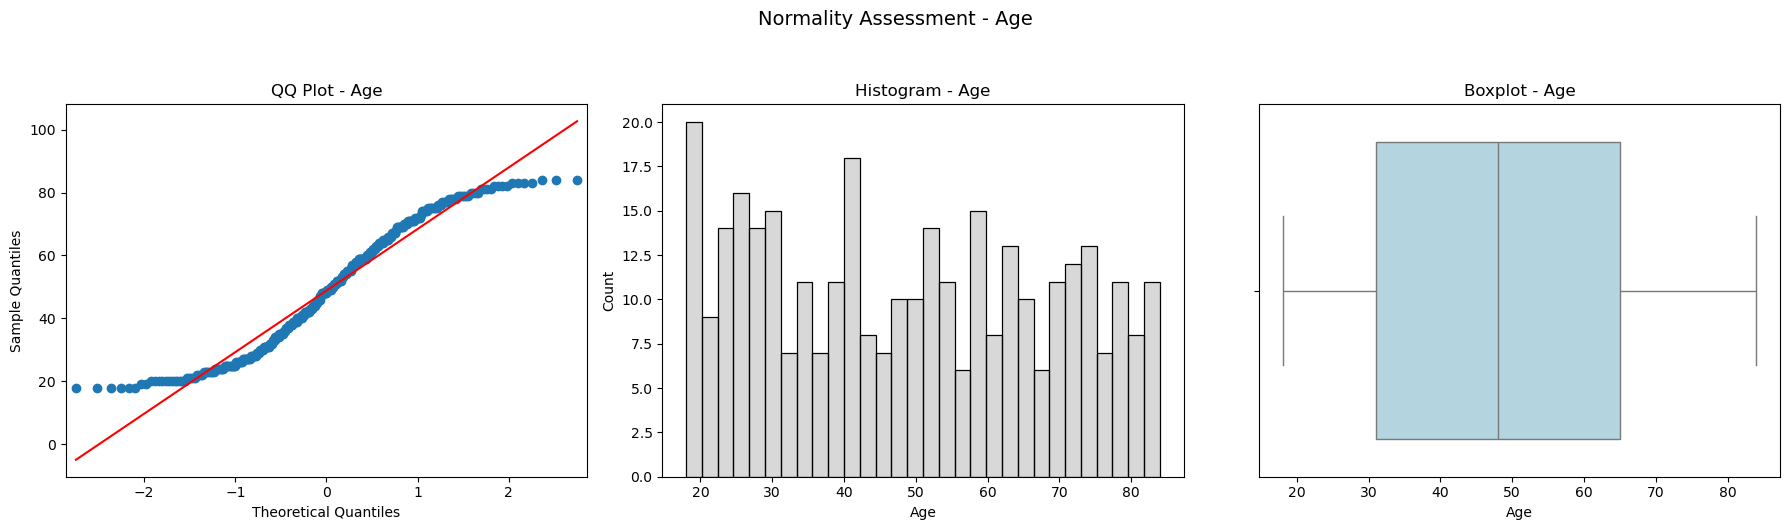


--- Variable: sleep(hrs)/weeknights ---
  Anderson-Darling Statistic : 19.3198
  Critical Value (@ 5.0%) : 0.7780
  Decision : Reject Null


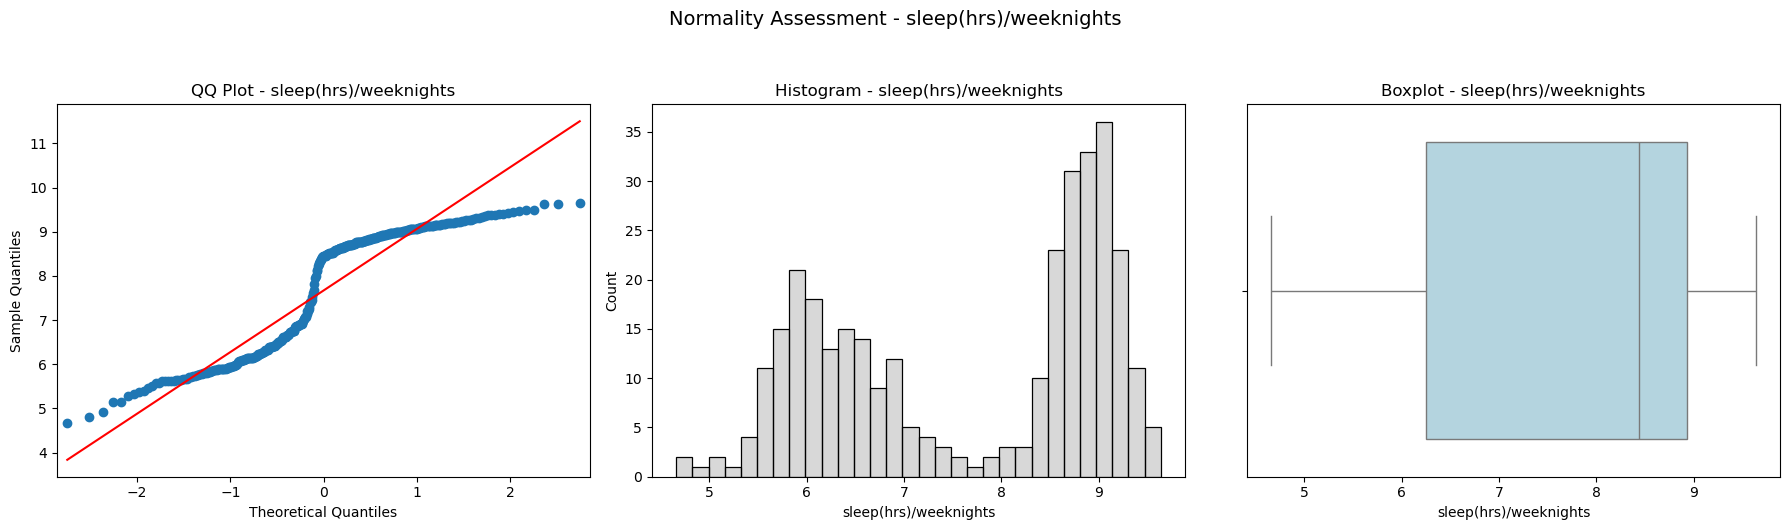

In [40]:
# Use the qdesc package to explore the data for assumption of normality (of all married). 
qd.normcheck_dashboard(Married)

In [ ]:
# The first graph indicates that the overall distribution of sleep hours is not normal, as the data points deviate from the expected straight line, especially at the extremes.
# The second graph shows that the sleep hours for married individuals are a much better fit for a normal distribution, with data points closely following the expected line.

In [43]:
# Generate a frequency distribution for a specified variable: Sex
qd.freqdist(df, 'Sex')

,Sex,Count,Percentage
0,Female,350,52.16
1,Male,321,47.84


In [44]:
# Generate a frequency distribution for a specified variable: Employment
qd.freqdist(df, 'Employment')

,Employment,Count,Percentage
0,Permanent,352,52.46
1,Probationary,319,47.54


In [45]:
# Generate a frequency distribution for a specified variable: Marital Status
qd.freqdist(df, 'MaritalStatus')

,MaritalStatus,Count,Percentage
0,Single,338,50.37
1,Married,333,49.63


In [46]:
# Generate frequency distribution for all the categorical features from the said data frame.
qd.freqdist_a(df)

,Column,Value,Count,Percentage
0,Sex,Female,350,52.16
1,Sex,Male,321,47.84
2,MaritalStatus,Single,338,50.37
3,MaritalStatus,Married,333,49.63
4,Employment,Permanent,352,52.46
5,Employment,Probationary,319,47.54


In [ ]:
# The sample has an almost equal number of males and females, with a slightly higher percentage of females than males.
# The majority of the respondents are in Permanent employment, with the rest being on Probationary status. The distribution is nearly balanced.
# The dataset is very evenly divided between Single and Married individuals, with almost equal representation for both groups. 

In [47]:
# Generating a frequency distribution but this time have it stored in an excel file and organized
# on a per sheet basis per categorical feature.
qd.freqdist_to_excel(df, "SleepHrsCategorical.xlsx")

Frequency distributions written to SleepHrsCategorical.xlsx
